# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# data cleaning
df.loc[df["sex"] == "female", "sex"] =1
df.loc[df["sex"] == "male", "sex"] =0
df.loc[df["smoker"] == "yes", "smoker"] =1 
df.loc[df["smoker"] == "no", "smoker"] =0

In [5]:
dummies = pd.get_dummies(df["region"])
mergedf = pd.concat([df, dummies], axis = 1)
df = mergedf.drop(["region", "northeast"], axis =1)

In [6]:
df["charges_duplicate"] = df.loc[:,"charges"]
df = df.drop(["charges"], axis =1)

In [7]:
df.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest,charges_duplicate
0,19,1,27.900,0,1,0,0,1,16884.92400
1,18,0,33.770,1,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,1,0,4449.46200
3,33,0,22.705,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,1,0,0,3866.85520


In [8]:
df.rename({"charges_duplicate":"charges"}, axis =1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest,charges
0,19,1,27.900,0,1,0,0,1,16884.92400
1,18,0,33.770,1,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,1,0,4449.46200
3,33,0,22.705,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,1,0,0,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [9]:
import numpy as np
# input in sklearn need to be array not dataframe (current)

In [10]:
data = np.array(df.iloc[:,:-1])
data

array([[19, 1, 27.9, ..., 0, 0, 1],
       [18, 0, 33.77, ..., 0, 1, 0],
       [28, 0, 33.0, ..., 0, 1, 0],
       ...,
       [18, 1, 36.85, ..., 0, 1, 0],
       [21, 1, 25.8, ..., 0, 0, 1],
       [61, 1, 29.07, ..., 1, 0, 0]], dtype=object)

In [11]:
target = np.array(df.iloc[:,-1])
cut = int((len(data)*0.8)//1)
indata = data[:cut]
outdata = data[cut:]

intarget = target[:cut]
outtarget = target[cut:]
# array = list of list = vectors = tensors
# know how to slice array and dataframe

# 3.) Normalize the Data

In [12]:
from sklearn import preprocessing

In [13]:
scaler = preprocessing.StandardScaler().fit(indata)
in_data_scale = scaler.transform(indata)
out_data_scale = scaler.transform(outdata)

In [14]:
print(in_data_scale)
print(out_data_scale)

[[-1.45390122  1.02077653 -0.47403991 ... -0.55791981 -0.6155209
   1.76504522]
 [-1.52464584 -0.97964634  0.4911621  ... -0.55791981  1.6246402
  -0.56655772]
 [-0.81719959 -0.97964634  0.36455128 ... -0.55791981  1.6246402
  -0.56655772]
 ...
 [-0.03900872 -0.97964634  1.95211949 ... -0.55791981 -0.6155209
  -0.56655772]
 [ 1.65886228 -0.97964634 -1.50008089 ...  1.79237229 -0.6155209
  -0.56655772]
 [ 1.02216066  1.02077653  0.18367867 ... -0.55791981  1.6246402
  -0.56655772]]
[[-0.18049797 -0.97964634  1.03377993 ... -0.55791981  1.6246402
  -0.56655772]
 [ 1.65886228 -0.97964634  0.10886318 ... -0.55791981 -0.6155209
  -0.56655772]
 [-1.31241197 -0.97964634  0.07762155 ...  1.79237229 -0.6155209
  -0.56655772]
 ...
 [-1.52464584  1.02077653  0.99760541 ... -0.55791981  1.6246402
  -0.56655772]
 [-1.31241197  1.02077653 -0.81934216 ... -0.55791981 -0.6155209
   1.76504522]
 [ 1.51737303  1.02077653 -0.28165722 ...  1.79237229 -0.6155209
  -0.56655772]]


# 4.) Get lambda from Lasso cross validation

In [15]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [16]:
modCV = LassoCV().fit(in_data_scale, intarget)
a = modCV.alpha_
print(a)

115.9799859390741


# 5.) Run a lasso regression with that Lambda

In [17]:
mod1 = Lasso(alpha = a).fit(in_data_scale,intarget)

In [18]:
mod1.predict(np.array(in_data_scale))
coef = pd.DataFrame(mod1.coef_)

# 6.) Visualize the coefficients 

In [19]:
pip install forestplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import forestplot as fp

In [21]:
var = pd.DataFrame({'varname':["age","sex","bmi","children","smoker","northwest","southeast","southwest"],'coef':mod1.coef_})
print(var)

     varname         coef
0        age  3580.306072
1        sex     0.000000
2        bmi  1897.533729
3   children   415.077454
4     smoker  9345.083664
5  northwest    -0.000000
6  southeast  -158.761426
7  southwest  -238.959142


Text(0.5, 1.0, 'Coefficient plot')

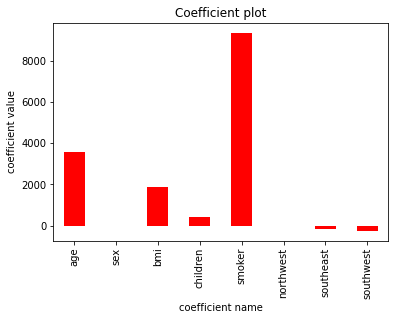

In [22]:
var.plot(x='varname', y='coef', kind='bar', color='red', 
            legend=False)
plt.xlabel('coefficient name')
plt.ylabel('coefficient value')
plt.title('Coefficient plot')

# 7.) Interpret the coefficients

Variables that are statistically significant areage, bmi, children, smoker and region. 

# 8.) Compare in and out of sample MSE’s

In [23]:
inpredict = mod1.predict(np.array(in_data_scale))
outpredict = mod1.predict(np.array(out_data_scale))

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
inMSE = mean_squared_error(intarget,inpredict)
outMSE = mean_squared_error(outtarget,outpredict)

In [26]:
print(inMSE)
print(outMSE)

36521737.38284563
37152352.79582482
